In [6]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf
plt.rcParams["font.size"]=13

Let the plasma frequency be $\omega_p$ and laser frequency be $\omega$. If
$$
\frac{\omega_p}{\omega} \lt 1,
$$
plasma is called underdense and is transparent to the laser.

We'll use a plasma with density $n_p = 10^{24} m^{-3}$. The plasma frequency is
$$
\begin{align*}
\omega_p &=56.5\sqrt{n}\\
&= 5.65\times 10^{13} Hz\\
\end{align*}
$$

So, the laser frequency should be greater than $5.65\times 10^{13} Hz$, or the wavelength should be less than $3.33\times 10^{-5} m = 33.3 \mu m$.

The density profile is set such that it is zero for y less than 0 and $n_p$ for y greater than 0.

In [7]:
EXTENT = [-20, 20, -20, 20]
all_files = [f for f in os.listdir(".") if f.endswith(".sdf")]

In [8]:
def plot_density(id, component="e"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "a": raw_data.Derived_Number_Density,
        "e": raw_data.Derived_Number_Density_Electron,
    }
    field = comp[component]
    t = raw_data.Header["time"] * 1e15
    # field = field / (field.max() + 1e-10)
    t = raw_data.Header["time"] * 1e15
    c_label = field.name
    plt.ion()
    plt.figure(figsize=(15, 8))
    plt.imshow(
        field.data, cmap="hot", origin="lower", extent=EXTENT, aspect="auto",
    )
    plt.xlabel("$Y \, [\mu m]$")
    plt.ylabel("$X \, [\mu m]$")
    plt.title(f"t = {t:.0f} fs")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(c_label)
    plt.show()

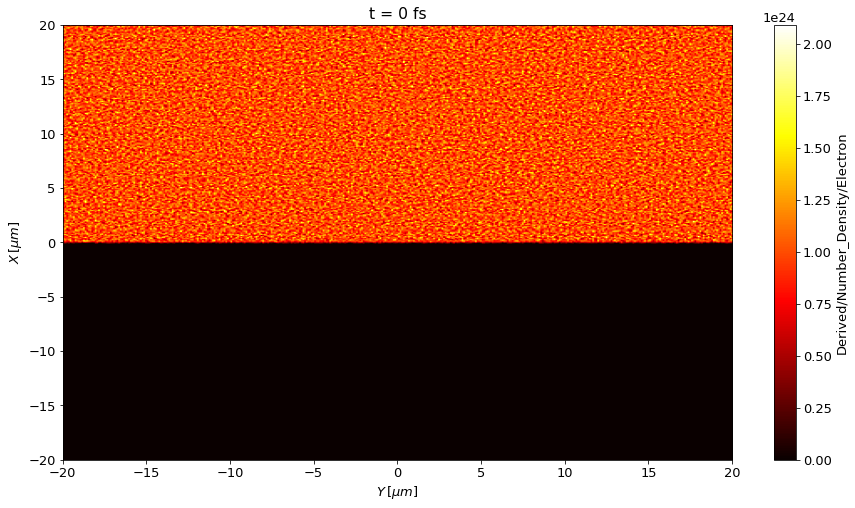

In [12]:
plot_density(0, component="e")

In [25]:
def plot_field(data_dir, ax, component="y"):
    raw_data = sdf.read(data_dir)
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    field = field / (field.max() + 1e-10)
    ax.imshow(
        field ** 2,
        cmap="jet",
        origin="lower",
        extent=EXTENT,
        aspect="auto",
        interpolation="nearest",
        # norm=colors.Normalize(vmin=-0.3, vmax=0.5),
    )
    ax.axhline(0, color="red", lw = 2)
    ax.set_xlabel("$y \, [\mu m]$")
    ax.set_ylabel("$x \, [\mu m]$")
    ax.set_title(f"t = {t:.0f} fs")


def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


def plot_with_scale(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component]

    t = raw_data.Header["time"] * 1e15
    c_label = f"$(E_{component})^2$ in $({field.units})^2$"
    plt.ion()
    plt.figure(figsize=(15, 8))
    plt.axhline(0, -20, 20)
    plt.imshow(
        field.data ** 2, cmap="jet", origin="lower", extent=EXTENT, aspect="auto",
    )
    plt.xlabel("$Y \, [\mu m]$")
    plt.ylabel("$X \, [\mu m]$")
    plt.title(f"t = {t:.0f} fs")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(c_label)
    plt.show()

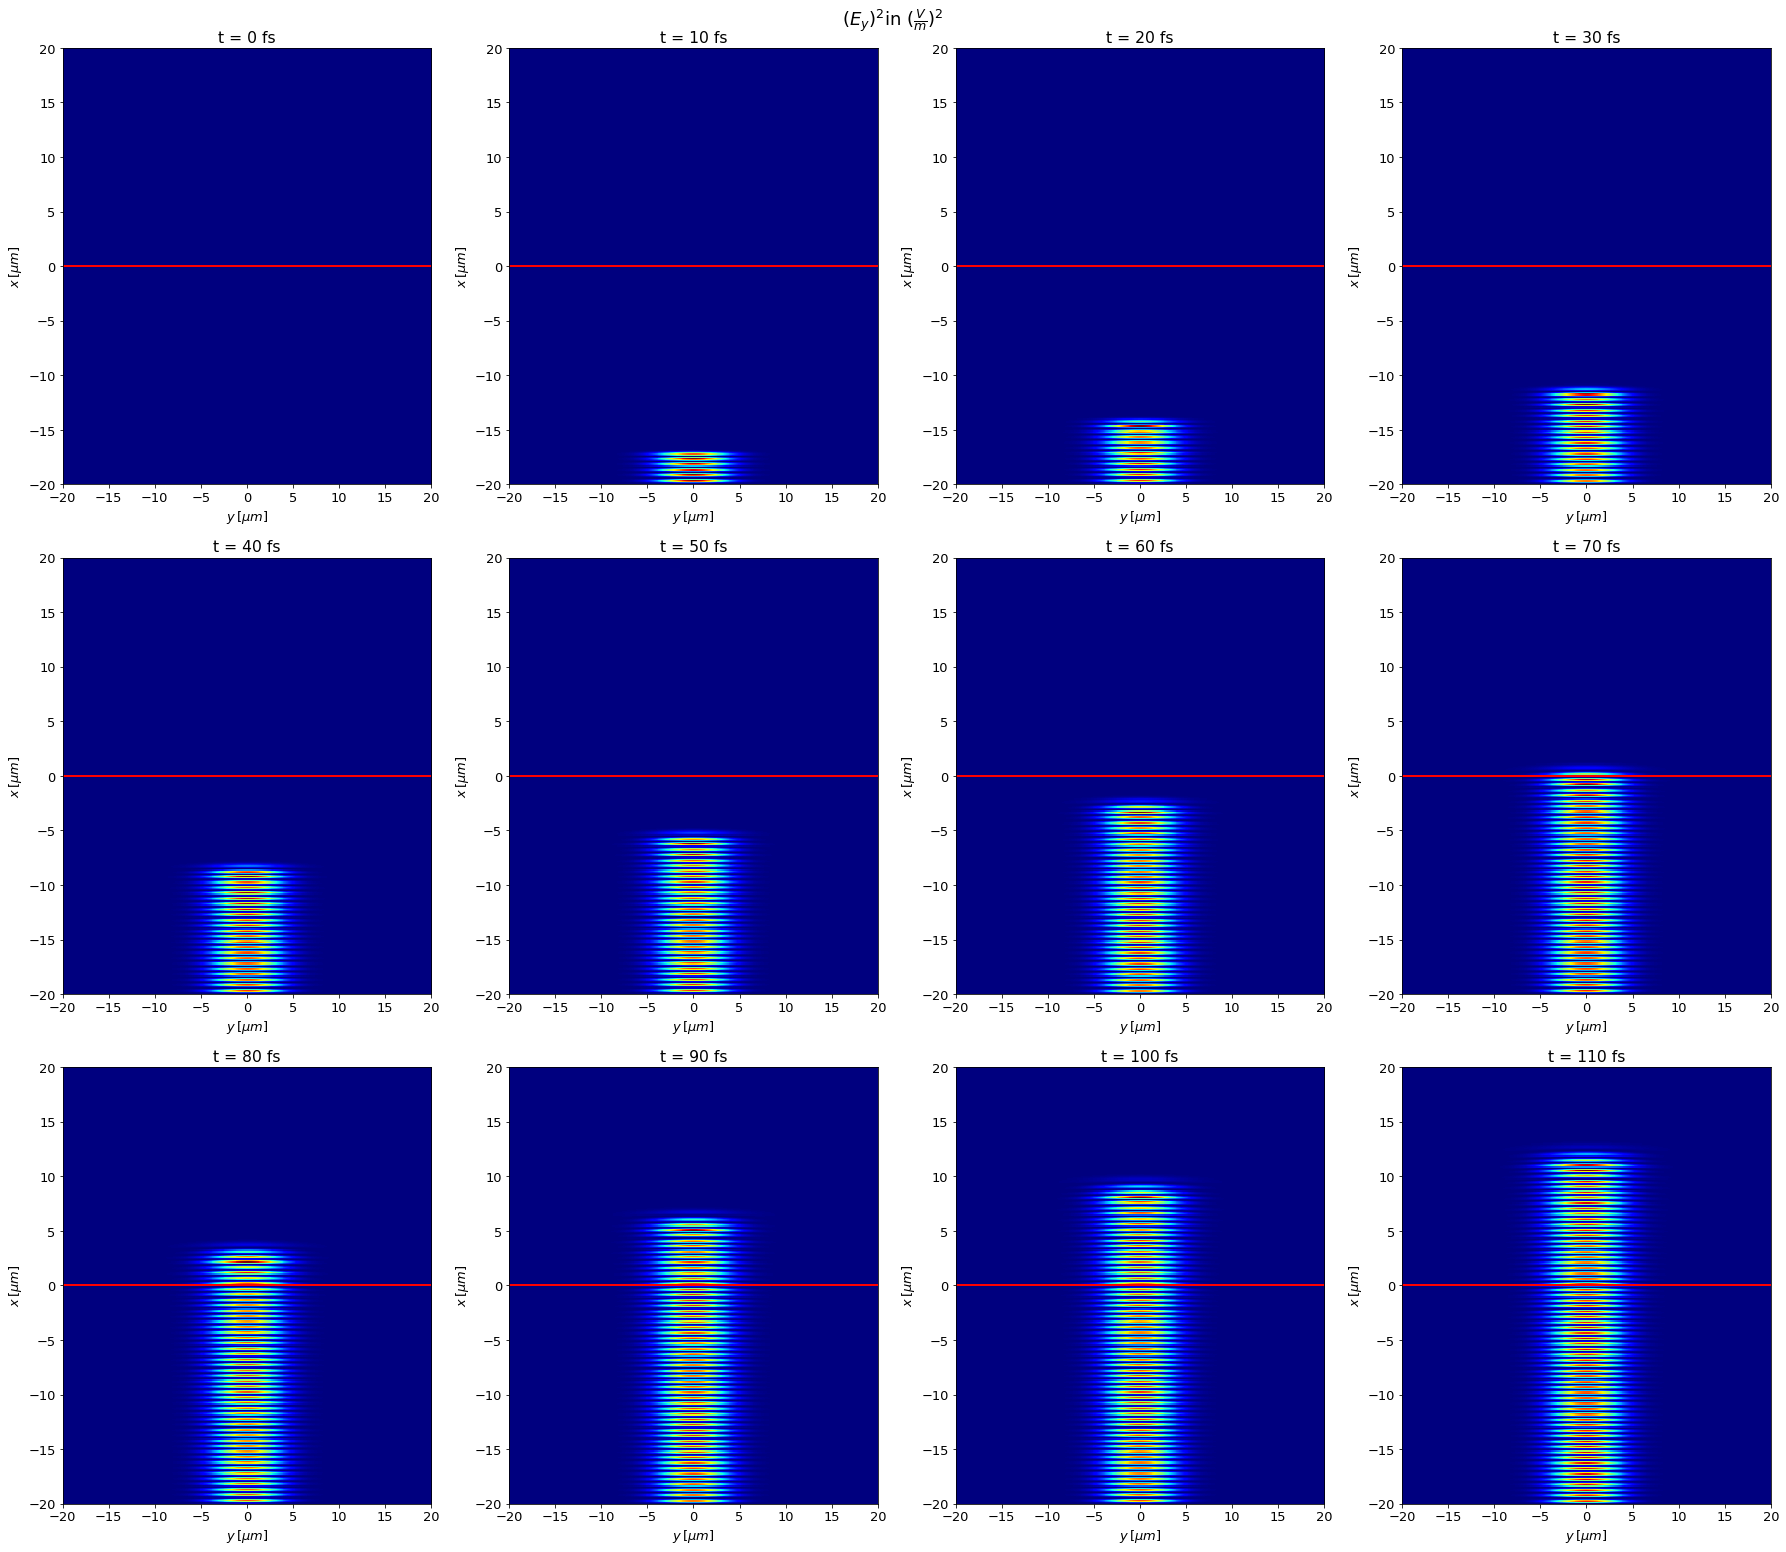

In [26]:
fig, ax = plt.subplots(3, 4, figsize=(25, 22))
i = 0
component = "y"
field = f"E_{component}"
fig.suptitle(rf"$({field})^2$" + r"in $({\frac{V}{m}})^2$", fontsize=18)
i = 0
for data_dir in all_files:
    t = i * 10
    plot_field(data_dir, ax[i // 4, i % 4], component=component)
    i += 1
fig.tight_layout()